In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import acf, adfuller
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_data = pd.read_csv('C:\\Users\\villain\\Downloads\\nitm18442004.csv')

In [3]:
#Figure 1.1
df_data

,x
0,4.5
1,2.4
2,4.8
3,9.1
4,10.9
...,...
1927,15.4
1928,13.2
1929,8.6
1930,8.2


In [4]:
#Figure 1.1
df_data.describe()

,x
count,1932.000000
mean,8.500776
std,3.825564
min,-0.900000
25%,5.300000
50%,8.200000
75%,12.100000
max,17.200000


In [5]:
#Figure 2
null_values = df_data.isnull()
na=df_data.isna()
print("null values: " ,null_values.sum())
print("NA values: ", na.sum())

null values:  x    0
dtype: int64
NA values:  x    0
dtype: int64


In [6]:
# creating a list of dates
dates = pd.date_range(start='1844-01-01', end='2004-12-01', freq='MS')

# creating a Series object
df = pd.Series(df_data['x'], index=dates)
df = df_data.squeeze()
df.index = dates


In [7]:
#Figure 3.1
df

1844-01-01     4.5
1844-02-01     2.4
1844-03-01     4.8
1844-04-01     9.1
1844-05-01    10.9
              ... 
2004-08-01    15.4
2004-09-01    13.2
2004-10-01     8.6
2004-11-01     8.2
2004-12-01     6.2
Freq: MS, Name: x, Length: 1932, dtype: float64

In [8]:
#Figure 2
null_values = df.isnull()
na=df.isna()
print("Monthly data null values: " ,null_values.sum())
print("Monthly data NA values: ", na.sum())

Monthly data null values:  0
Monthly data NA values:  0


In [9]:
df

1844-01-01     4.5
1844-02-01     2.4
1844-03-01     4.8
1844-04-01     9.1
1844-05-01    10.9
              ... 
2004-08-01    15.4
2004-09-01    13.2
2004-10-01     8.6
2004-11-01     8.2
2004-12-01     6.2
Freq: MS, Name: x, Length: 1932, dtype: float64

In [10]:
#Figure 4.1
adf_test = adfuller(df)
print('ADF test statistic:', adf_test[0])
print('p-value:', adf_test[1])
print('Critical values:', adf_test[4])

ADF test statistic: -5.000623974120477
p-value: 2.2130135390220797e-05
Critical values: {'1%': -3.433787340386774, '5%': -2.8630583903440656, '10%': -2.567578333092222}


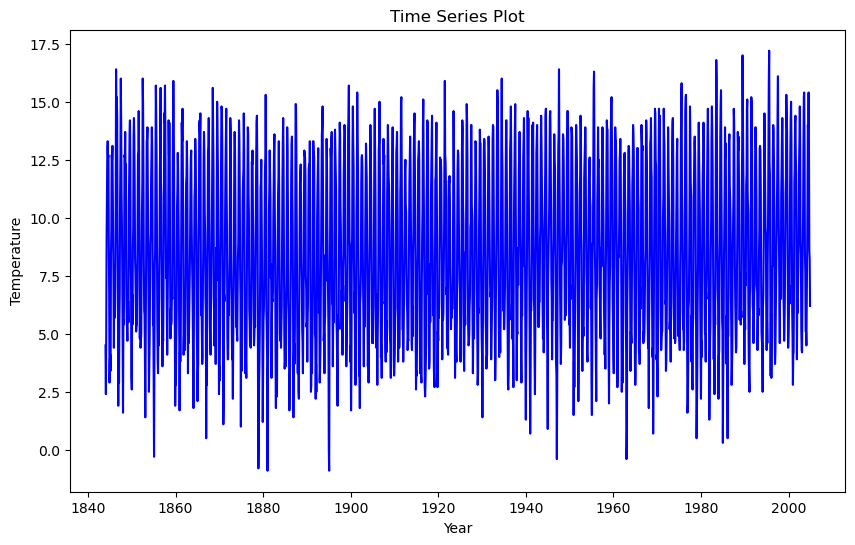

In [11]:
#Figure 5.1
import pandas as pd
import matplotlib.pyplot as plt

# ploting the time series data
plt.figure(figsize=(10, 6))
plt.plot(df, color='blue')
plt.title('Time Series Plot')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

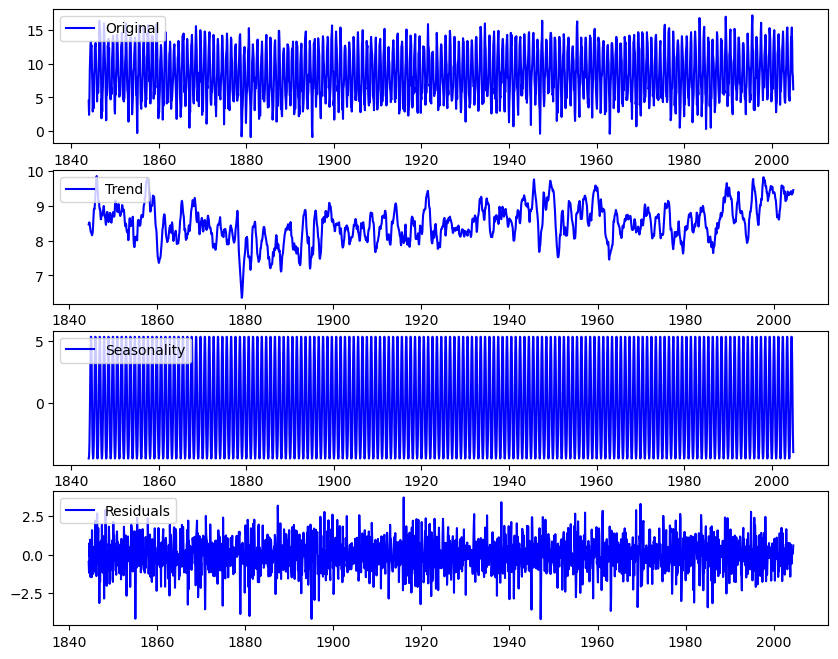

In [12]:
#Figure 6.1
# ploting the seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df, label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='upper left')
plt.show()


<Figure size 1000x600 with 0 Axes>

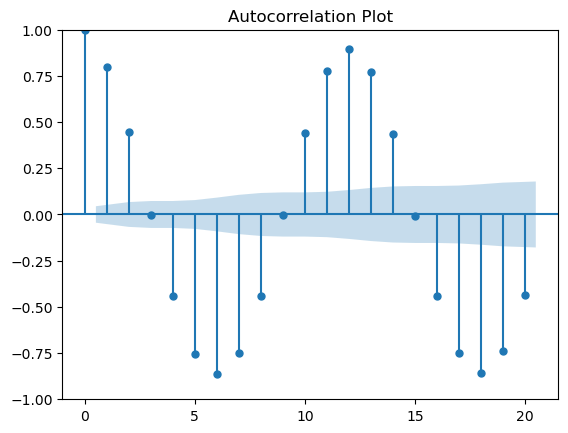

<Figure size 1000x600 with 0 Axes>

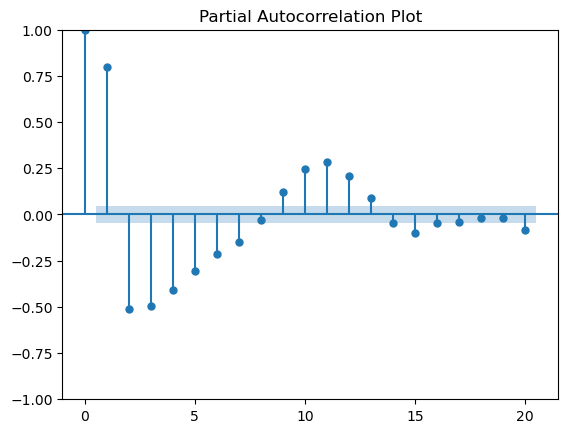

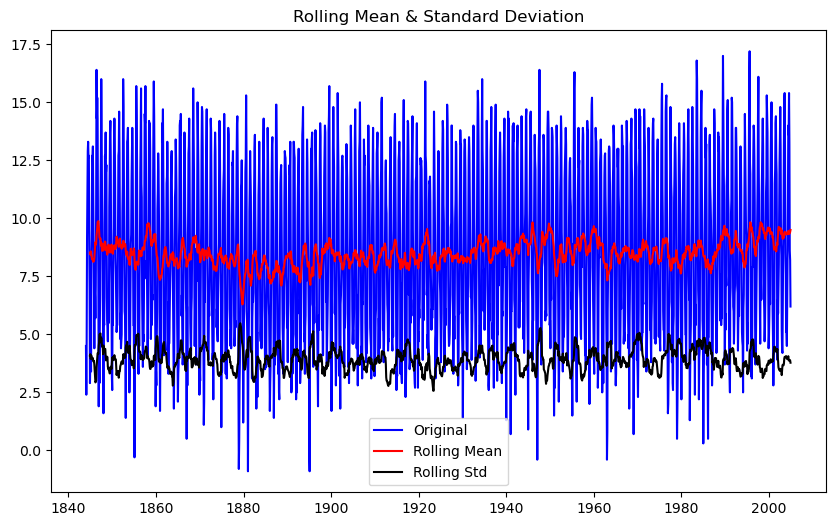

In [13]:
#Figure 7.1
# ploting the autocorrelation and partial autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 6))
plot_acf(df, lags=20)
plt.title('Autocorrelation Plot')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(df, lags=20)
plt.title('Partial Autocorrelation Plot')
plt.show()

# ploting the rolling statistics
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()

plt.figure(figsize=(10, 6))
plt.plot(df, color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [14]:
# Spliting the data into training and testing sets
train = df.loc[:'2003']
test = df.loc['2004']

In [15]:
test

2004-01-01     5.1
2004-02-01     4.5
2004-03-01     6.2
2004-04-01     8.3
2004-05-01    10.7
2004-06-01    14.0
2004-07-01    13.6
2004-08-01    15.4
2004-09-01    13.2
2004-10-01     8.6
2004-11-01     8.2
2004-12-01     6.2
Freq: MS, Name: x, dtype: float64

In [16]:
# Exponential smoothing
model_es = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
fit_es = model_es.fit()
forecast_es = fit_es.forecast(len(test))
# hot linear
model_holt = ExponentialSmoothing(train,trend='add', damped=False)
fit_holt= model_holt.fit()
predictions_holt = fit_holt.forecast(len(test))
#olt winter
model_hw = ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='add',damped=True)
fit_hw=model_hw.fit()
predictions_hw = fit_hw.forecast(len(test))
#damped trend
model_damped = ExponentialSmoothing(train, trend='add', damped=True).fit()
predictions_damped = model_damped.forecast(len(test))


# SARIMAX 
model_sarima = SARIMAX(train, order=(2, 0, 7), seasonal_order=(2, 0, 7, 12), enforce_stationarity=False, 
                       enforce_invertibility=False)
fit_sarima = model_sarima.fit()
forecast_sarima = fit_sarima.forecast(len(test))

# Simple exponential 
model_ses = SimpleExpSmoothing(train)
fit_ses= model_ses.fit()
pred_ses = fit_ses.forecast(len(test))
#random walk
result = seasonal_decompose(train, model='additive', period=12)
seasonal = result.seasonal
forecast_rw = test.shift(1)

# Seasonal Naive model
seasonal_naive_model = sm.tsa.UnobservedComponents(train, 'local level', seasonal=12)
fit_snaive=seasonal_naive_model.fit()
forecast_snaive = fit_snaive.forecast(steps=len(test))



In [17]:
forecast_rw = forecast_rw.fillna(forecast_rw.mean())

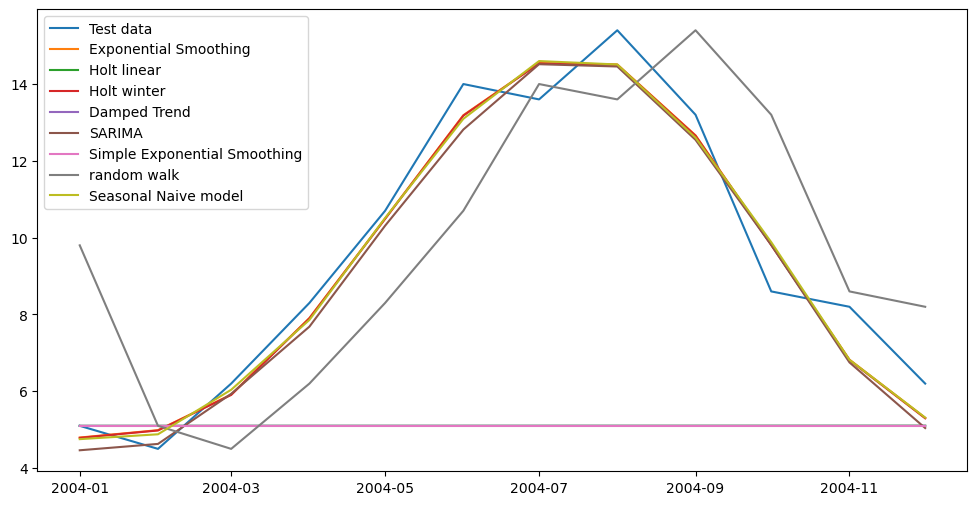

In [18]:
#Figure 10.1
# Ploting the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Test data')
plt.plot(forecast_es.index, forecast_es.values, label='Exponential Smoothing')
plt.plot(predictions_holt.index, predictions_holt.values, label='Holt linear')
plt.plot(predictions_hw.index, predictions_hw.values, label='Holt winter')
plt.plot(predictions_damped.index, predictions_damped.values, label='Damped Trend')
plt.plot(forecast_sarima.index, forecast_sarima.values, label='SARIMA')
plt.plot(pred_ses.index, pred_ses.values, label='Simple Exponential Smoothing')
plt.plot(forecast_rw.index, forecast_rw.values, label='random walk')
plt.plot(forecast_snaive.index, forecast_snaive.values, label='Seasonal Naive model')
plt.legend()
plt.show()



In [19]:
from tabulate import tabulate
test = test.reset_index(drop=True)

forecast_es= forecast_es.reset_index(drop=True)
predictions_holt= predictions_holt.reset_index(drop=True)
predictions_hw= predictions_hw.reset_index(drop=True)
predictions_damped= predictions_damped.reset_index(drop=True)
forecast_sarima= forecast_sarima.reset_index(drop=True)
pred_ses= pred_ses.reset_index(drop=True)
forecast_rw = forecast_rw.reset_index(drop=True)
forecast_snaive= forecast_snaive.reset_index(drop=True)
row = [ forecast_es,  predictions_holt,predictions_hw,predictions_damped,forecast_sarima, pred_ses,forecast_rw, forecast_snaive, test]
head = [ "Exponential Smoothing","Holt Linear","Holt Winter","Damped trend", "SARIMA", "Simple Exponential","Random Walk","Deasonal Naive model", "Test Values"]
table = [row]
print(tabulate(table, headers=head, tablefmt="fancy_grid", floatfmt=".2f"))


╒═════════════════════════╤════════════════╤═════════════════╤════════════════╤══════════════════════════════════════╤══════════════════════╤═════════════════════════╤══════════════════════════════════════╤═════════════════════════╕
│ Exponential Smoothing   │ Holt Linear    │ Holt Winter     │ Damped trend   │ SARIMA                               │ Simple Exponential   │ Random Walk             │ Deasonal Naive model                 │ Test Values             │
╞═════════════════════════╪════════════════╪═════════════════╪════════════════╪══════════════════════════════════════╪══════════════════════╪═════════════════════════╪══════════════════════════════════════╪═════════════════════════╡
│ 0      4.794754         │ 0     5.100302 │ 0      4.787414 │ 0     5.100073 │ 0      4.463344                      │ 0     5.1            │ 0      9.8              │ 0      4.753143                      │ 0      5.1              │
│ 1      4.987259         │ 1     5.100605 │ 1      4.979239 │ 1    

In [20]:
# Calculate evaluation metrics

mse_es = mean_squared_error(test, forecast_es)
mae_es = mean_absolute_error(test, forecast_es)
r2_es = r2_score(test, forecast_es)
rmse_es = mean_squared_error(test, forecast_es, squared=False)
mape_es = mean_absolute_percentage_error(test, forecast_es)

mse_hl = mean_squared_error(test, predictions_holt)
mae_hl = mean_absolute_error(test, predictions_holt)
r2_hl = r2_score(test, predictions_holt)
rmse_hl = mean_squared_error(test, predictions_holt, squared=False)
mape_hl = mean_absolute_percentage_error(test, predictions_holt)

mse_hw = mean_squared_error(test, predictions_hw)
mae_hw = mean_absolute_error(test, predictions_hw)
r2_hw = r2_score(test, predictions_hw)
rmse_hw = mean_squared_error(test, predictions_hw, squared=False)
mape_hw = mean_absolute_percentage_error(test, predictions_hw)

mse_d = mean_squared_error(test, predictions_damped)
mae_d = mean_absolute_error(test, predictions_damped)
r2_d = r2_score(test, predictions_damped)
rmse_d = mean_squared_error(test, predictions_damped, squared=False)
mape_d = mean_absolute_percentage_error(test, predictions_damped)


############################################################################
mse_sarima = mean_squared_error(test, forecast_sarima)
mae_sarima = mean_absolute_error(test, forecast_sarima)
r2_sarima = r2_score(test, forecast_sarima)
rmse_sarima = mean_squared_error(test, forecast_sarima, squared=False)
mape_sarima = mean_absolute_percentage_error(test, forecast_sarima)



##################################################################################
mse_ses = mean_squared_error(test, pred_ses)
mae_ses = mean_absolute_error(test, pred_ses)
r2_ses = r2_score(test, pred_ses)
rmse_ses = mean_squared_error(test, pred_ses, squared=False)
mape_ses = mean_absolute_percentage_error(test, pred_ses)

mse_rw = mean_squared_error(test, forecast_rw)
mae_rw = mean_absolute_error(test, forecast_rw)
r2_rw = r2_score(test, forecast_rw)
rmse_rw = mean_squared_error(test, forecast_rw, squared=False)
mape_rw = mean_absolute_percentage_error(test, forecast_rw)

mse_sn = mean_squared_error(test, forecast_snaive)
mae_sn = mean_absolute_error(test, forecast_snaive)
r2_sn = r2_score(test, forecast_snaive)
rmse_sn = mean_squared_error(test, forecast_snaive, squared=False)
mape_sn = mean_absolute_percentage_error(test, forecast_snaive)

In [21]:
#Figure 9.1
# AIC stands for Akaike Information Criterion and BIC stands for Bayesian Information Criterion.
aic_es = fit_es.aic
bic_es = fit_es.bic

aic_hw = fit_hw.aic
bic_hw = fit_hw.bic

aic_holt = fit_holt.aic
bic_holt = fit_holt.bic

aic_damp = fit_holt.aic
bic_damp = fit_holt.bic

aic_ses = fit_ses.aic
bic_ses = fit_ses.bic

aic_sarima = fit_sarima.aic
bic_sarima = fit_sarima.bic


aic_snaive = fit_snaive.aic
bic_snaive = fit_snaive.bic
print("Exponential smoothing: ", aic_es, bic_es)
print("Holt winter: ", aic_hw, bic_hw)
print("Holt lineat: ", aic_holt, bic_holt)
print("Damped trend: ", aic_damp, bic_damp)
print("Simple Exponential smoothing: ", aic_ses, bic_ses)
print("SARIMA: ", aic_sarima, bic_sarima)






Exponential smoothing:  758.9611135169156 847.9224009572648
Holt winter:  760.4526226978752 854.9739906032463
Holt lineat:  3430.951186667374 3453.1915085274613
Damped trend:  3430.951186667374 3453.1915085274613
Simple Exponential smoothing:  3426.9511476984344 3438.071308628478
SARIMA:  5889.875867503403 5994.584444791671


In [22]:
#Figure 8.1
# Evaluating the models based on the evaluation metrics
metrics = pd.DataFrame({'Exponential Smoothing': [mse_es, mae_es, r2_es, rmse_es, mape_es, bic_es],
                        'Holt Linear': [mse_hl, mae_hl, r2_hl, rmse_hl, mape_hl, bic_holt],
                        'Holt winter': [mse_hw, mae_hw, r2_hw, rmse_hw, mape_hw, bic_hw],
                        'Damped trend': [mse_d, mae_d, r2_d, rmse_d, mape_d, bic_damp],
                        'SARIMA': [mse_sarima, mae_sarima, r2_sarima, rmse_sarima, mape_sarima, bic_sarima],
                        'SEASONAL NAIVE': [mse_sn, mae_sn, r2_sn, rmse_sn, mape_sn, bic_snaive],
                        'Random walking': [mse_rw, mae_rw, r2_rw, rmse_rw, mape_rw, 0],
                       'Simple Exponential Smoothing': [mse_ses, mae_ses, r2_ses, rmse_ses, mape_ses, bic_ses]},
                       index=['MSE', 'MAE', 'R2','RMSE','MAPE','BIC'])

print(metrics)



      Exponential Smoothing  Holt Linear  Holt winter  Damped trend  \
MSE                0.618377    32.430184     0.624247     32.450567   
MAE                0.695486     4.498186     0.700688      4.500059   
R2                 0.952760    -1.477478     0.952311     -1.479035   
RMSE               0.786369     5.694751     0.790093      5.696540   
MAPE               0.079997     0.393588     0.080564      0.393781   
BIC              847.922401  3453.191509   854.973991   3453.191509   

           SARIMA  SEASONAL NAIVE  Random walking  \
MSE      0.790603        0.652381        6.663333   
MAE      0.795941        0.705039        2.183333   
R2       0.939603        0.950162        0.490960   
RMSE     0.889159        0.807701        2.581343   
MAPE     0.089493        0.079253        0.271777   
BIC   5994.584445     6226.354547        0.000000   

      Simple Exponential Smoothing  
MSE                      32.450000  
MAE                       4.500000  
R2                 

In [23]:
# Choosing the best model based on the evaluation metrics
best_model = metrics.idxmin(axis=1)[0]
print('The best model is:', best_model)



The best model is: Exponential Smoothing


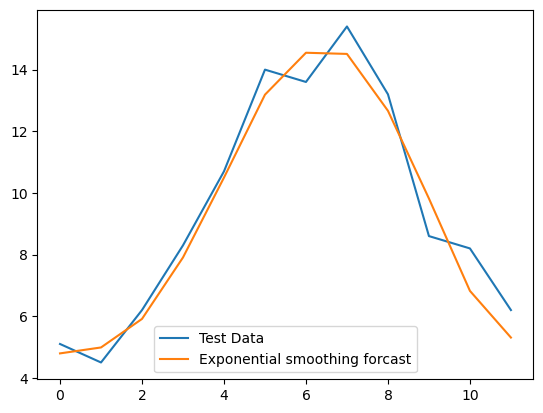

In [24]:
plt.plot(test, label='Test Data')
plt.plot(forecast_es, label='Exponential smoothing forcast')
plt.legend()
plt.show()

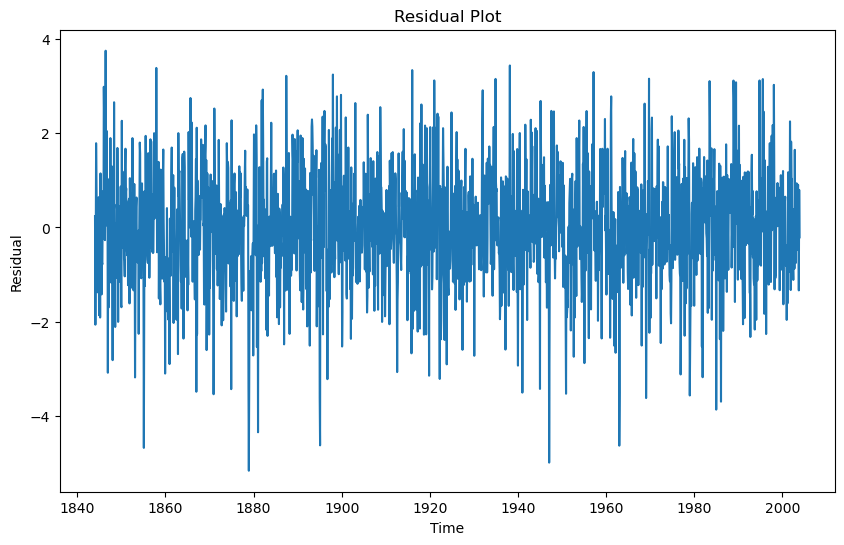

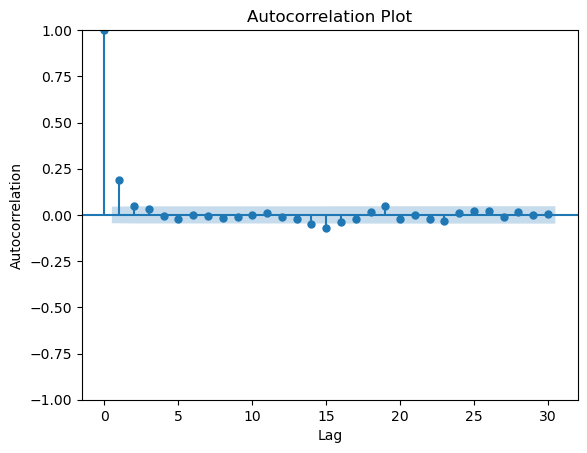

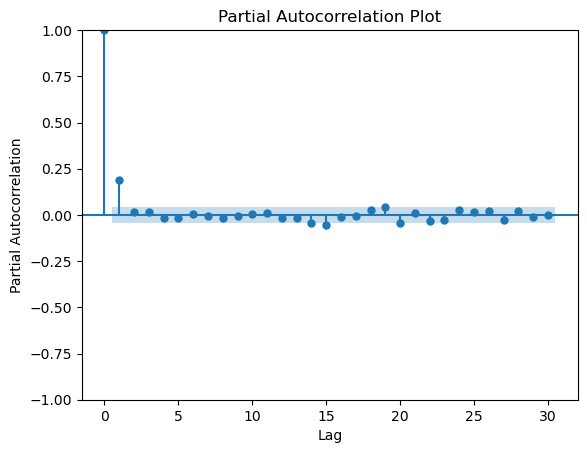

In [25]:
#Figure 11.1 and 12.1
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Geting the residuals
residuals = pd.Series(fit_es.resid)

# Creating the residual plot
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residual Plot')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.show()

plot_acf(residuals, lags=30)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()
# Creating the partial autocorrelation plot
plot_pacf(residuals, lags=30)
plt.title('Partial Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


In [26]:

#Figure 13.1
from statsmodels.stats.stattools import jarque_bera

# Performing Jarque-Bera test
_, pvalue, _, _ = jarque_bera(residuals)
print(pvalue)

# Checking normality assumption
if pvalue < 0.05:
    print('The residuals are not normally distributed.')
else:
    print('The residuals are normally distributed.')


6.79812383944469e-14
The residuals are not normally distributed.


In [27]:
#Figure 14.1
dwtest = durbin_watson(forecast_es)

# Printing the Durbin-Watson statistic and p-value
print(f'Durbin-Watson statistic: {dwtest:.2f}')
if dwtest < 2 or dwtest > 4:
    print('Autocorrelation is present')

Durbin-Watson statistic: 0.04
Autocorrelation is present


In [28]:
#Figure 15.1
#forcasting for the year 2005
model_es = ExponentialSmoothing(df, trend='add', seasonal='add', seasonal_periods=12)
fit_es = model_es.fit()
forecast_es = fit_es.forecast(len(test))
   
print('Forecasts for the next 12 months:\n', forecast_es)


Forecasts for the next 12 months:
 2005-01-01     4.871098
2005-02-01     5.058672
2005-03-01     5.989730
2005-04-01     7.984130
2005-05-01    10.574198
2005-06-01    13.267365
2005-07-01    14.616438
2005-08-01    14.589724
2005-09-01    12.742523
2005-10-01     9.885378
2005-11-01     6.905874
2005-12-01     5.388489
Freq: MS, dtype: float64
